In [1]:
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
import os
os.environ['THEANO_FLAGS'] = 'device=gpu1'

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.objectives import categorical_crossentropy
from keras.datasets import mnist

import umap

In [4]:
batch_size = 5000

%time (X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Wall time: 312 ms
60000 train samples
10000 test samples


In [5]:
reducer = umap.UMAP()

embedding = reducer.fit_transform(X_train)
print(embedding.shape)

(60000, 2)


In [9]:
print(embedding[:, 0:10])

[[ 2.1996589   1.5726935 ]
 [12.245407    0.69104505]
 [-2.3838286   8.161236  ]
 ...
 [ 2.0146062   1.9036031 ]
 [ 7.793198   -2.9201481 ]
 [-3.882833   -1.0574918 ]]


In [10]:
model = Sequential()
model.add(Dense(500, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(500, activation='relu'))
model.add(Dense(2000, activation='relu'))
model.add(Dense(2))
%time model.compile(loss='mean_squared_error', optimizer='Adam')

Wall time: 31.2 ms


In [11]:
%time model.fit(X_train, embedding, batch_size=batch_size, shuffle=False, epochs=100)

C:\Users\pi514\.conda\envs\par_tsne\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/100
60000/60000 [==============================] - 1s 12us/step - loss: 14.7646
Epoch 2/100
60000/60000 [==============================] - 0s 5us/step - loss: 6.8640
Epoch 3/100
60000/60000 [==============================] - 0s 6us/step - loss: 4.0945
Epoch 4/100
60000/60000 [==============================] - 0s 6us/step - loss: 2.9616
Epoch 5/100
60000/60000 [==============================] - 0s 6us/step - loss: 2.3305
Epoch 6/100
60000/60000 [==============================] - 0s 6us/step - loss: 1.9314
Epoch 7/100
60000/60000 [==============================] - 0s 6us/step - loss: 1.6429
Epoch 8/100
60000/60000 [==============================] - 0s 6us/step - loss: 1.4188
Epoch 9/100
60000/60000 [==============================] - 0s 5us/step - loss: 1.2410
Epoch 10/100
60000/60000 [==============================] - 0s 5us/step - loss: 1.0958
Epoch 11/100
60000/60000 [==============================] - 0s 5us/step - loss: 0.9722
Epoch 12/100
60000/60000 [========================

60000/60000 [==============================] - 0s 5us/step - loss: 0.0556
Epoch 96/100
60000/60000 [==============================] - 0s 6us/step - loss: 0.0552
Epoch 97/100
60000/60000 [==============================] - 0s 6us/step - loss: 0.0522
Epoch 98/100
60000/60000 [==============================] - 0s 5us/step - loss: 0.0552
Epoch 99/100
60000/60000 [==============================] - 0s 6us/step - loss: 0.0508
Epoch 100/100
60000/60000 [==============================] - 0s 6us/step - loss: 0.0506
Wall time: 34.1 s


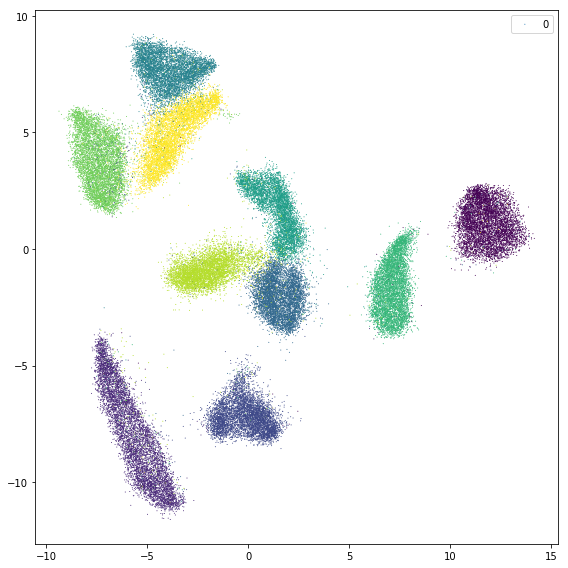

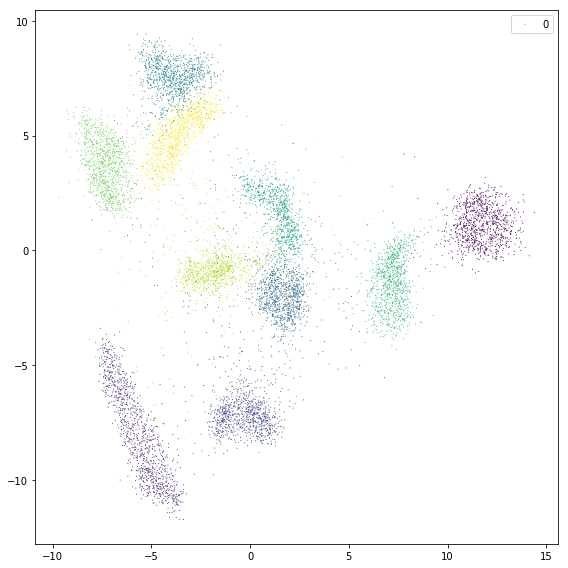

In [18]:
def plot_model(embedding, labels):
    N = np.unique(labels)
    cmap = plt.cm.jet
    # extract all colors from the .jet map
    cmaplist = [cmap(i) for i in range(cmap.N)]
    # create the new map
    cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
    fig = plt.figure(figsize=(8,8))
    plt.scatter(embedding[:,0], embedding[:,1], marker='o', s=1, edgecolor='', c=labels, label=labels)
    fig.tight_layout()
    
from matplotlib.lines import Line2D
def plot_differences(embedding, actual, lim=1000):
    fig = plt.figure(figsize=(8,8))
    ax = fig.gca()
    for a, b in zip(embedding, actual)[:lim]:
        ax.add_line(Line2D((a[0], b[0]), (a[1], b[1]), linewidth=1))
    ax.autoscale_view()
    plt.show()
    
plot_model(model.predict(X_train), y_train)
plot_model(model.predict(X_test), y_test)